In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [8]:
exp9_df = pd.read_csv('./csv/exp9_1.csv', sep=',')

In [9]:
exp9_cut_df = exp9_df.dropna()

In [15]:
exp9_cut_df = exp9_cut_df[exp9_cut_df['reference_M_Pa']>0]

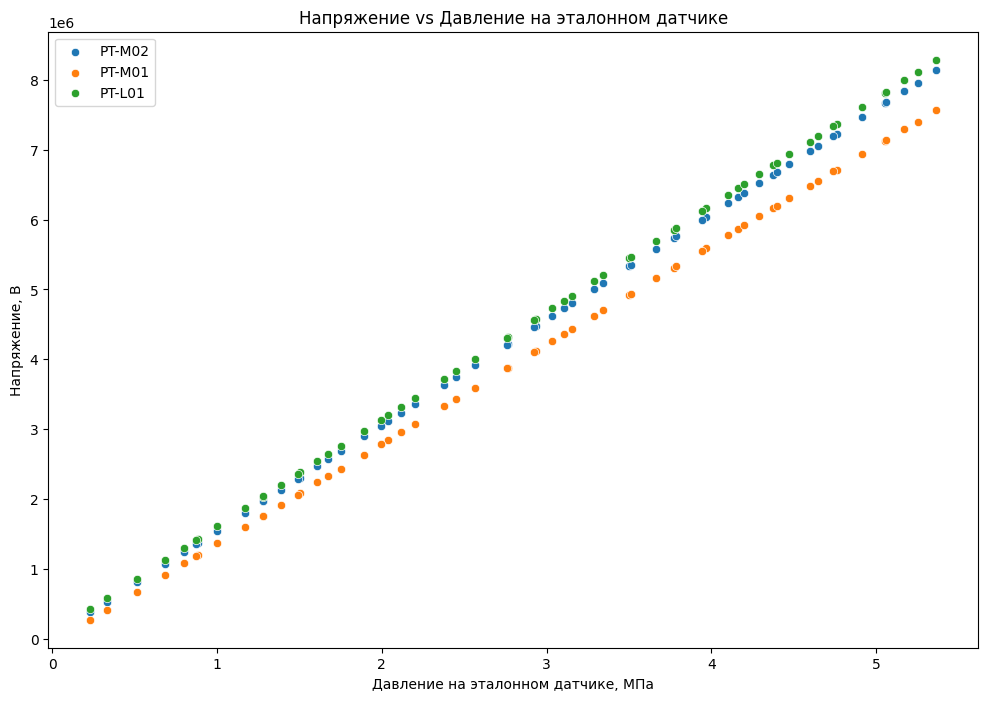

In [23]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp9_cut_df, x='reference_M_Pa', y='1_0_V', label='PT-M02')
sns.scatterplot(data=exp9_cut_df, x='reference_M_Pa', y='1_1_V', label='PT-M01')
sns.scatterplot(data=exp9_cut_df, x='reference_M_Pa', y='1_2_V', label='PT-L01')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('Напряжение vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data.png')
plt.show()

In [21]:
def plot_regression_with_error(sensor_voltage, sensor_name):
    # Подготовка данных
    x = exp9_cut_df[sensor_voltage].values.reshape(-1, 1)
    y = exp9_cut_df['reference_M_Pa'].values

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(x, y)

    # Получение коэффициентов регрессии
    coef = model.coef_[0]
    intercept = model.intercept_

    # Предсказанные значения
    y_pred = model.predict(x)

    # Вычисление коэффициента детерминации R^2 и средней квадратичной ошибки
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Вычисление средней относительной ошибки
    relative_errors = np.abs((y - y_pred) / y) * 100
    mean_relative_error = np.mean(relative_errors)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Данные измерений')
    plt.plot(x, y_pred, color='red', label=f'Линия регрессии: y = {coef:.4f}x + {intercept:.4f}')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Давление на эталонном датчике, МПа')
    plt.title(f'Линия регрессии. {sensor_name}\n$R^2 = {r2:.4f}$, MSE = {mse:.4f}, MRE = {mean_relative_error:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./results/fig/regression_{sensor_name}.png')
    plt.show()
    print(f'{sensor_name} y = {coef}x + {intercept}')

    # Построение графика остатков
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Остатки, МПа')
    plt.title(f'График остатков. {sensor_name}')
    plt.grid(True)
    plt.savefig(f'./results/fig/residuals_{sensor_name}.png')
    plt.show()


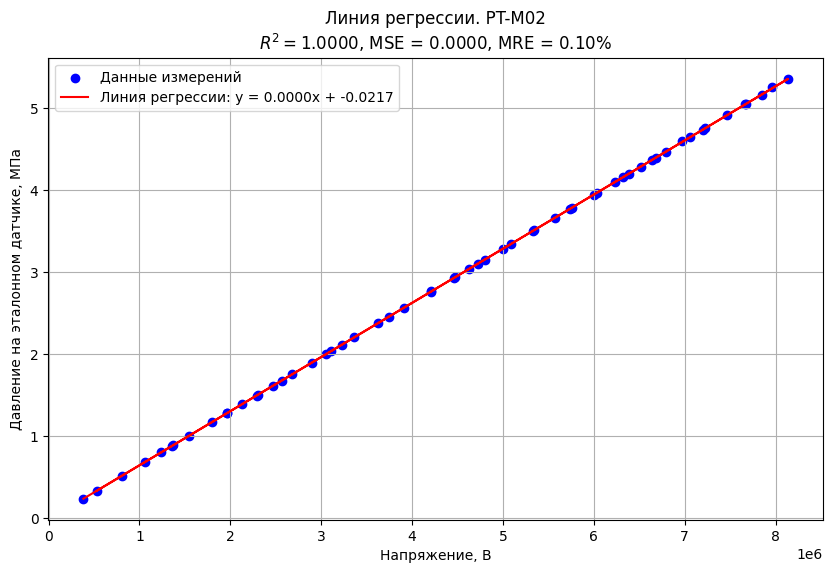

PT-M02 y = 6.612467449690746e-07x + -0.021665635111280057


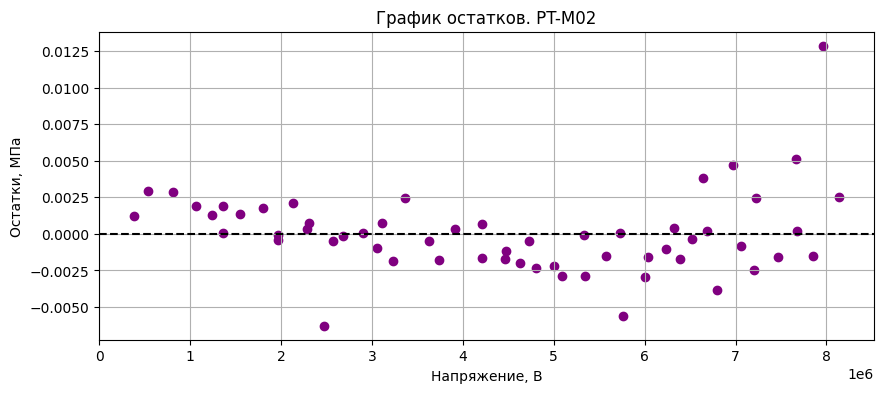

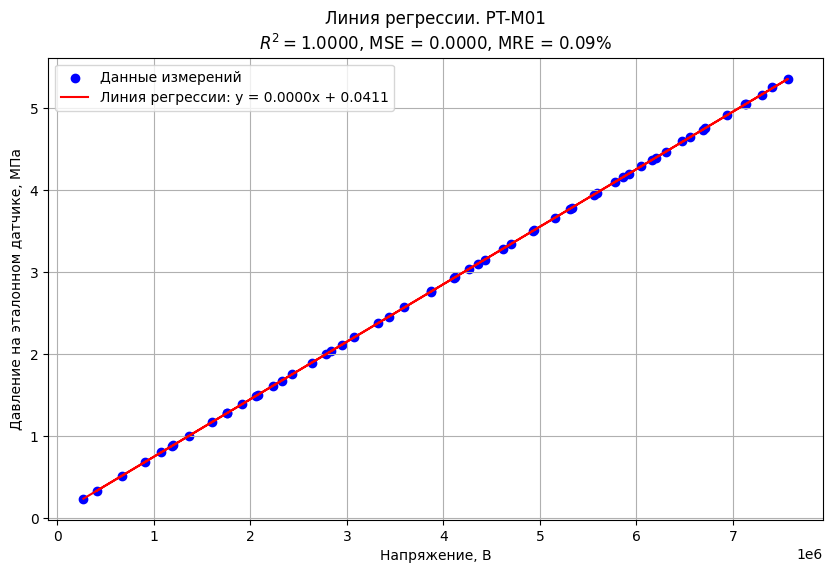

PT-M01 y = 7.025890811101967e-07x + 0.0411111232427217


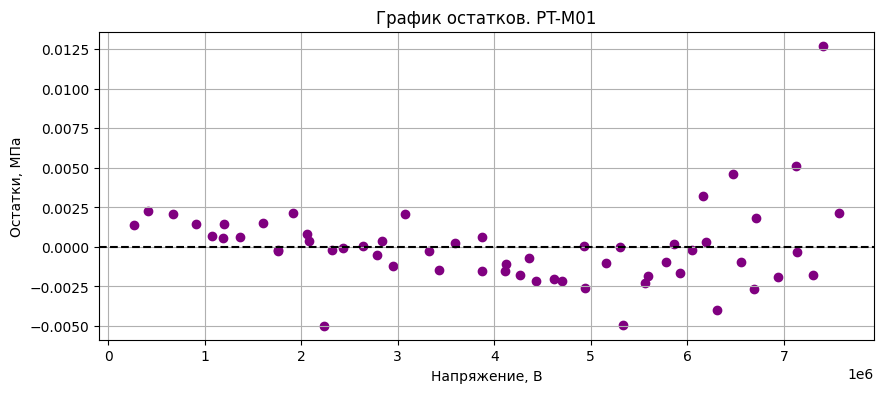

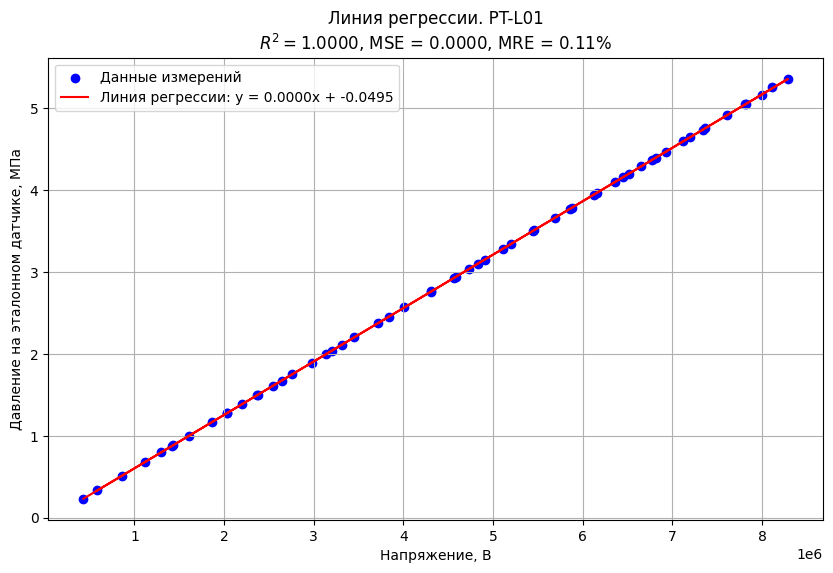

PT-L01 y = 6.524572692935255e-07x + -0.049528652152238895


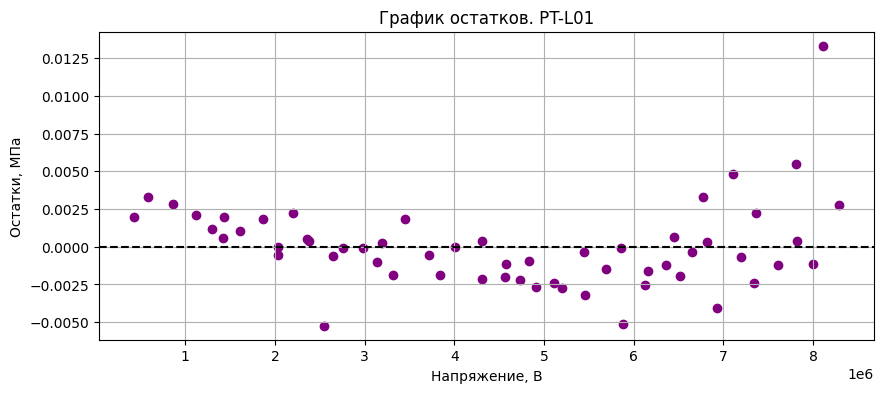

In [22]:
# Построение графиков для каждого датчика
plot_regression_with_error('1_0_V', 'PT-M02')
plot_regression_with_error('1_1_V', 'PT-M01')
plot_regression_with_error('1_2_V', 'PT-L01')